# 2 - COMPUTER VISION - Color Spaces
    The aim of this task is to show the differences between RGB / BGR and HLS

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

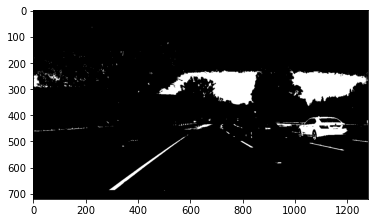

In [5]:
image = mpimg.imread('images/test6.jpg')

thresh = (180, 255)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

plt.imshow(binary, cmap='gray')

     We can also take an image an analyse it as individual channels

In [7]:
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

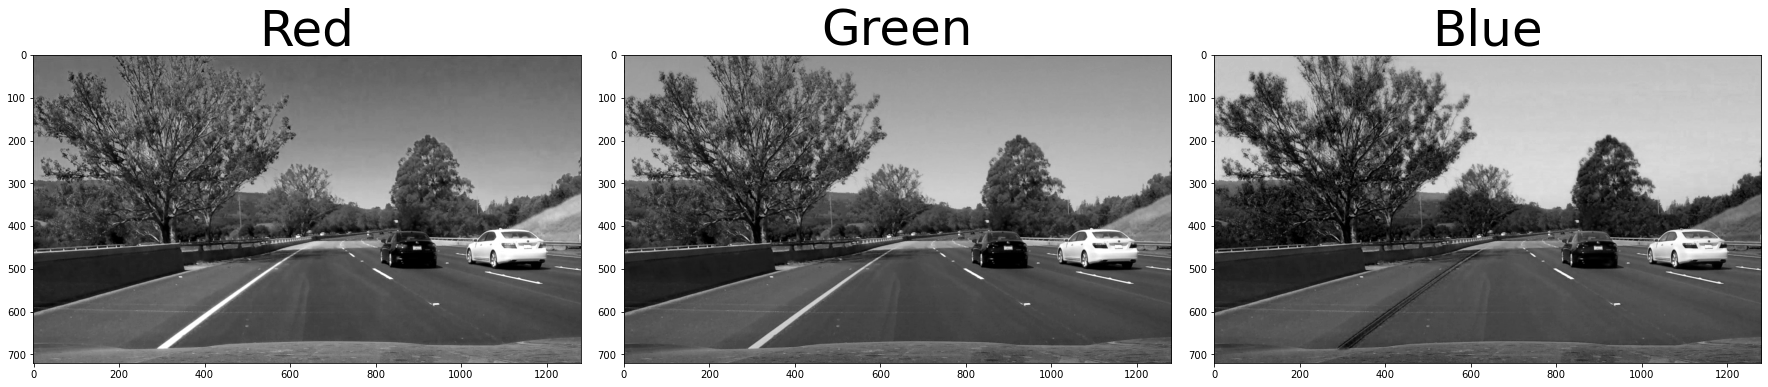

In [9]:
# Plot the channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(R, cmap='gray')
ax1.set_title('Red', fontsize=50)

ax2.imshow(G, cmap='gray')
ax2.set_title('Green', fontsize=50)

ax3.imshow(B, cmap='gray')
ax3.set_title('Blue', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

    We can see, that a RED channel is able to see the lines in the
    brest way. We can apply the same threshold again to find the lines

In [10]:
thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1

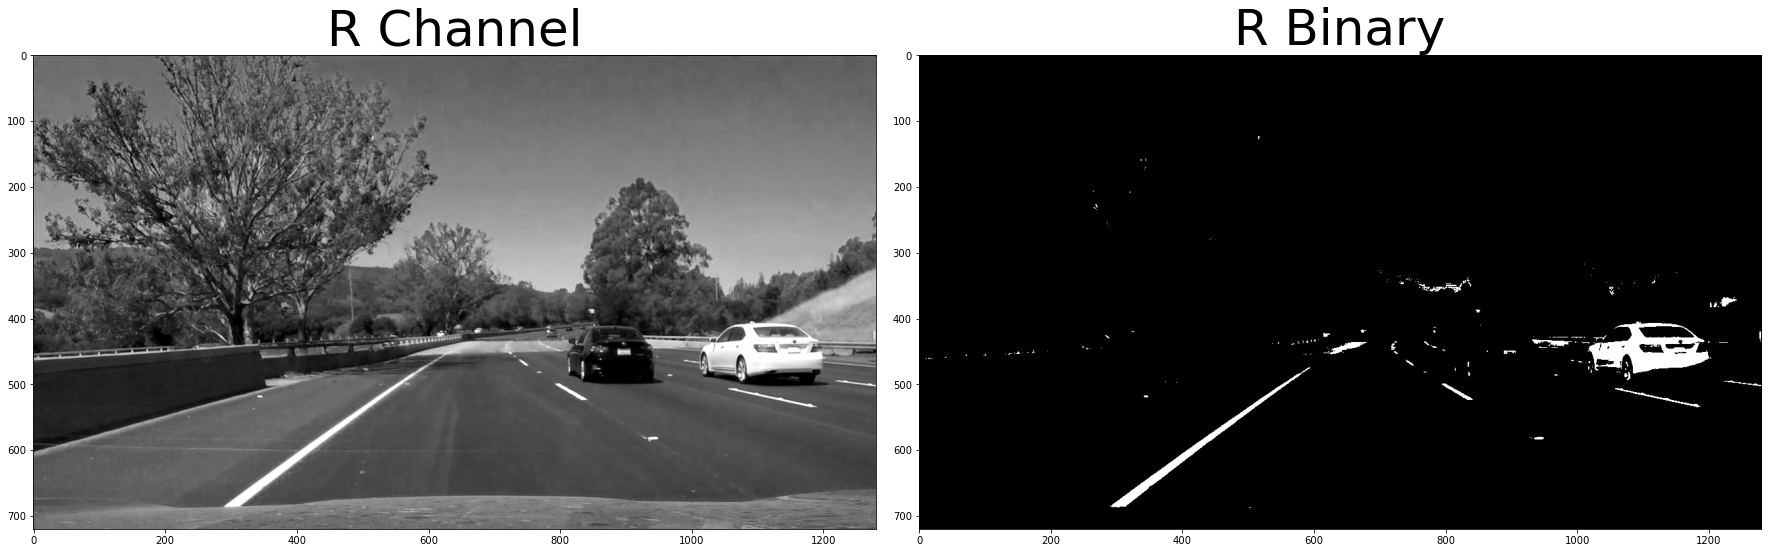

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(R, cmap='gray')
ax1.set_title('R Channel', fontsize=50)

ax2.imshow(binary, cmap='gray')
ax2.set_title('R Binary', fontsize=50)


plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## LET'S EXAMIN NOW HLS COLORSPACE


In [12]:
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

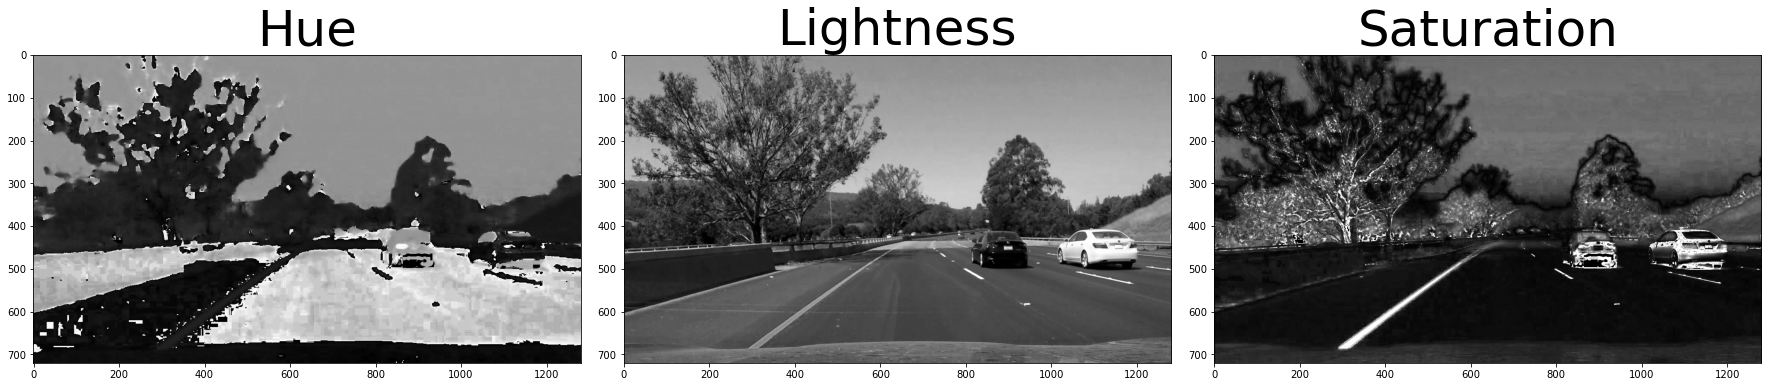

In [13]:
# Plot the channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()

ax1.imshow(H, cmap='gray')
ax1.set_title('Hue', fontsize=50)

ax2.imshow(L, cmap='gray')
ax2.set_title('Lightness', fontsize=50)

ax3.imshow(S, cmap='gray')
ax3.set_title('Saturation', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

The Saturation channel is able to find the lines in a very good way!, lets apply threshold to it

In [14]:
thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1

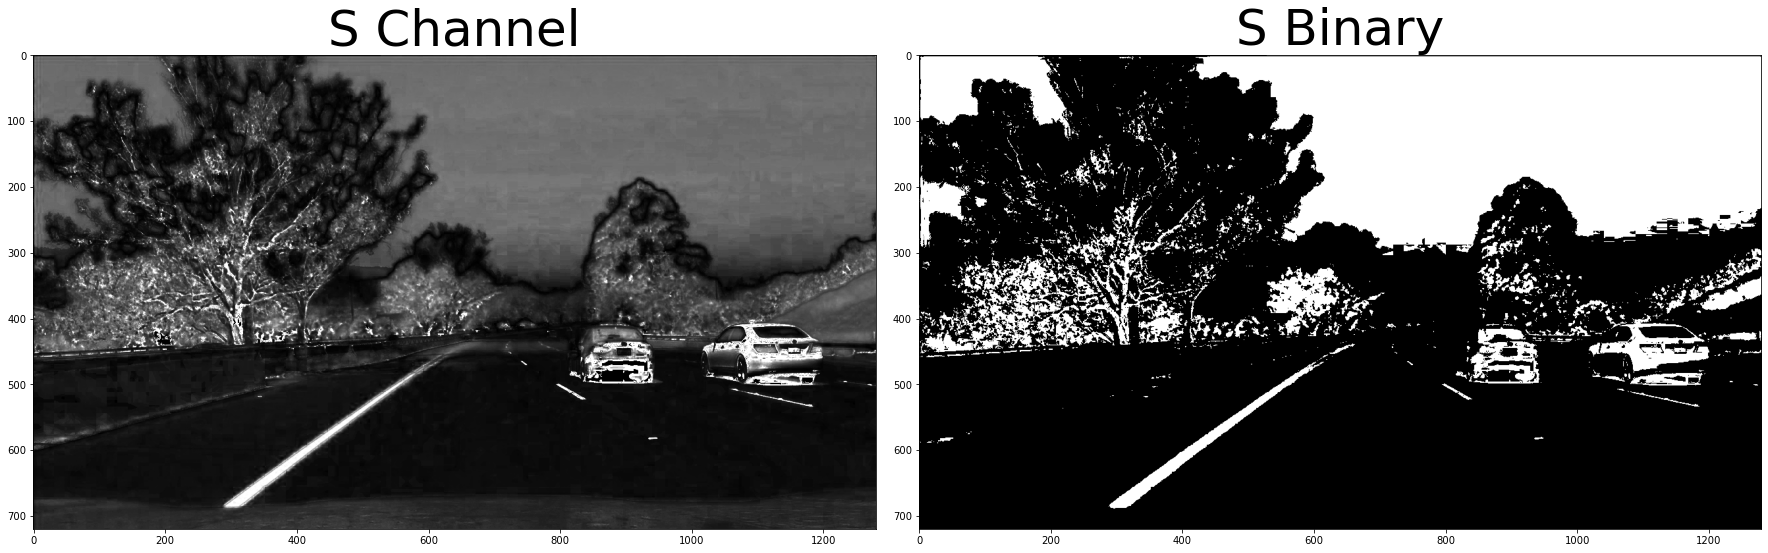

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(S, cmap='gray')
ax1.set_title('S Channel', fontsize=50)

ax2.imshow(binary, cmap='gray')
ax2.set_title('S Binary', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Observation in the H channel gives us the cpnclusion, that the lines there appear dark, we are able to threshold them as well  
    

In [16]:
thresh = (15, 100)
binary = np.zeros_like(H)
binary[(H > thresh[0]) & (H <= thresh[1])] = 1

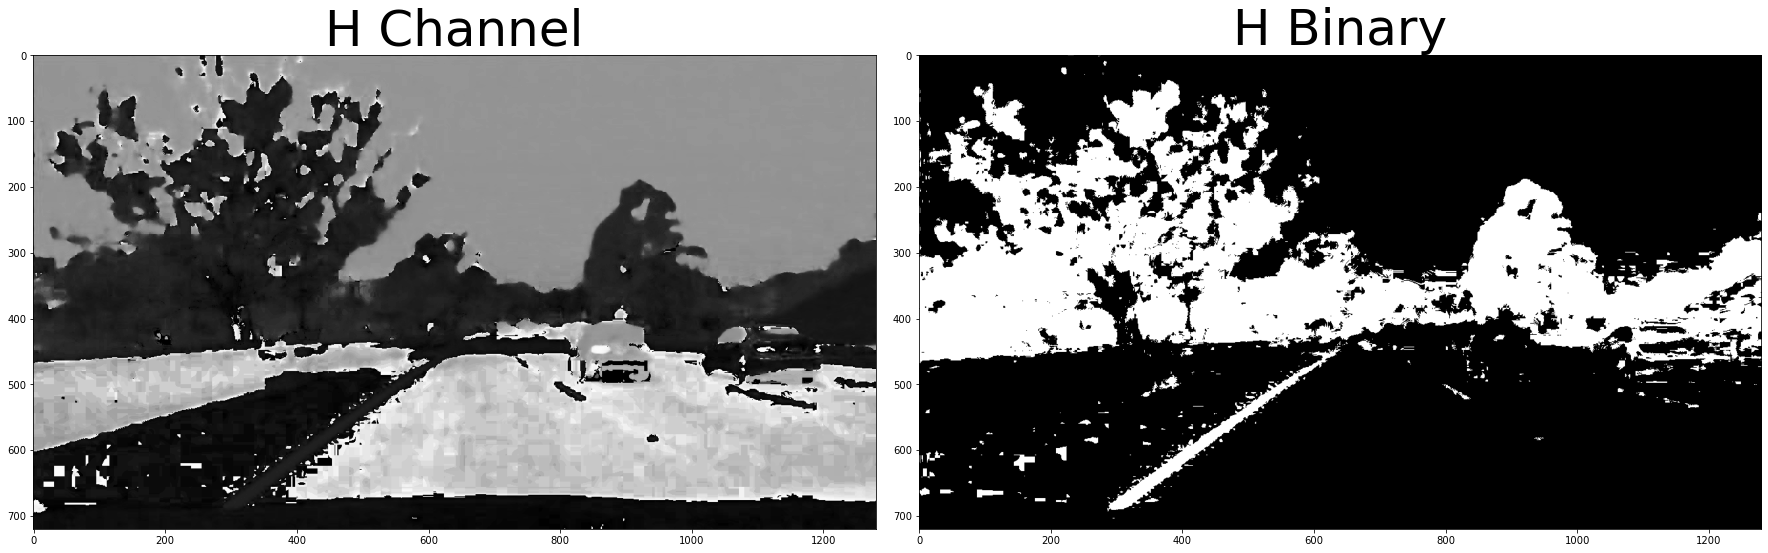

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(H, cmap='gray')
ax1.set_title('H Channel', fontsize=50)

ax2.imshow(binary, cmap='gray')
ax2.set_title('H Binary', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

It is wort noting, that there everything looks fine, but when we move forward to the next frames, we will see, that The S channel is doing the best job

As it is always not an easy choice, to make the best usage from the system as possible, it could be clever to join somehow the results from both images.